# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Kernel ACP

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Aplicar Kernel ACP

In [5]:
from sklearn.decomposition import KernelPCA

In [6]:
# Aplicamos un discriminante de componentes no lineales para despues poder abordar el problema como si fuera lineal con LoR
kpca = KernelPCA(n_components = 2, kernel = "rbf") # tipo de función a aplicar para elevar de dimensión (usamos el gaussiano)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicción de los resultados con el Conjunto de Testing

In [9]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm # vemos que 4 casos de la clase 0 que clasificó como 1 y 6 casos de la clase 1 que clasificó como 0 (índices 0,1)

array([[64,  4],
       [ 6, 26]], dtype=int64)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_2840\850138730.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


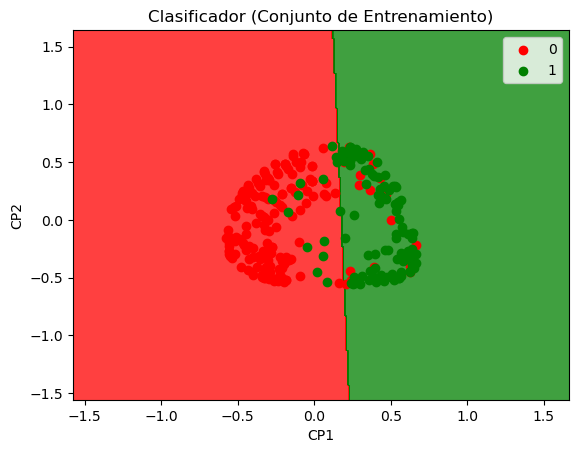

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Crear el grid de puntos para visualizar el área de decisión
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Predecir para cada punto del grid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Dibujar el área de decisión
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Dibujar los puntos de datos
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)

# Añadir título y etiquetas
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()
# Las nuevas componentes principales que han salido le dan una mejor separación de nuestros datos al modelo (existía un hiperplano separador bueno de nuestros datos)
# Con ACP Kernel sigo devolviendo las 2 direcciones que explican la mayor varianza de mis datos
# SI NO ANDA VER CÓDIGO EN REGRESIÓN LOGÍSTICA

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_2840\2738358282.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


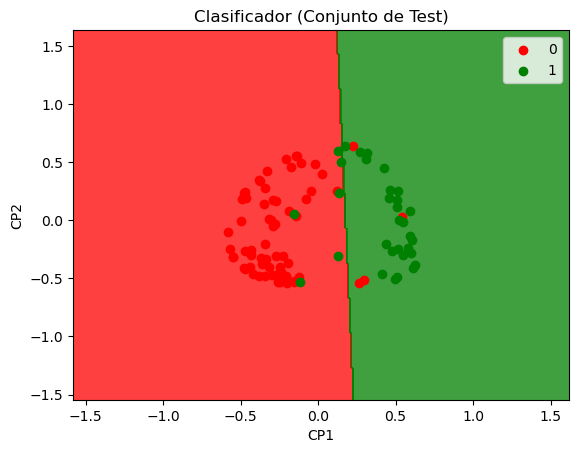

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Crear el grid de puntos para visualizar el área de decisión
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir para cada punto del grid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Dibujar el área de decisión
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Dibujar los puntos de datos
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['red', 'green'])(i), label=j)

# Añadir título y etiquetas
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()